# Privacy TP 2
Tientso Ning

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
%matplotlib inline

(250, 250)


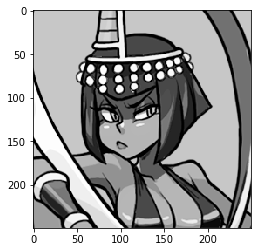

In [2]:
#read the image liftingbody
img = cv2.imread("eliza.png",0)
plt.imshow(img, cmap="Greys_r")
print(img.shape)

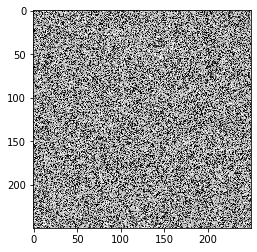

In [3]:
#create a permutation matrix
id_mat = np.identity(img.shape[0])
perm = np.random.permutation(np.copy(img).flatten())
perm_img = np.reshape(perm, img.shape)
plt.imshow(perm_img, cmap="Greys_r")

Text(0.5, 1.0, 'Permuted Image')

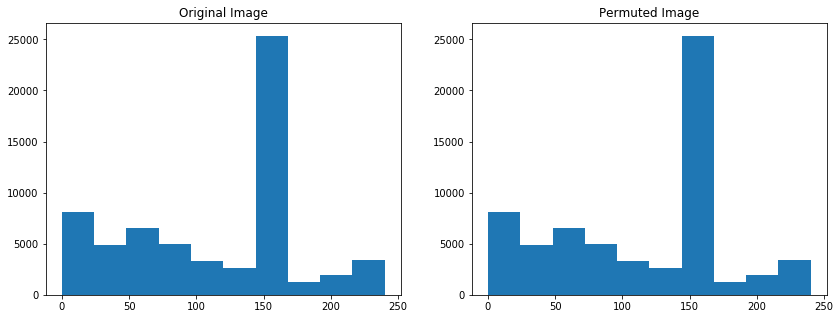

In [4]:
#do the histogram of both and compare
f, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].hist(img.flatten())
ax[0].set_title("Original Image")
ax[1].hist(perm_img.flatten())
ax[1].set_title("Permuted Image")

Here we can see that no information was lost, since the histograms show that the two images contains the exact same distribution of pixel values meaning that the image values were simply moved around.

In [5]:
#model block loss
def block_loss(img, N, M):
    loss = np.copy(img)
    
    #random location for block loss
    x = np.random.randint(0, img.shape[0])
    loss[x:x+N,x:x+M] = 0
    
    return loss

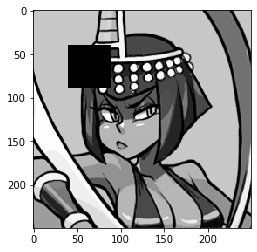

In [6]:
plt.imshow(block_loss(img, 50,50), cmap="Greys_r")

Text(0.5, 1.0, 'Reconstructed from Permuted')

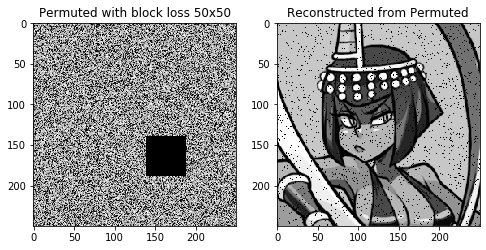

In [22]:
#take permuted image and apply block loss
ex3 = np.copy(img)
perm_mat = np.random.permutation(ex3.shape[0]*ex3.shape[1])
ex3_perm = np.reshape(ex3.flatten()[perm_mat], ex3.shape)
ex3_perm_loss = block_loss(ex3_perm, 50, 50)
inv_perm = np.argsort(perm_mat)
ex3_recon = np.reshape(ex3_perm_loss.flatten()[inv_perm], ex3.shape)

f, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(ex3_perm_loss, cmap="Greys_r")
ax[0].set_title("Permuted with block loss 50x50")
ax[1].imshow(ex3_recon, cmap="Greys_r")
ax[1].set_title("Reconstructed from Permuted")

Here we can see that because the permutation essentially "spreads out" the information, even when we have a block loss, that loss of information is spread out throughout the image. Our reconstruction is reminiscent of an image that underwent salt and pepper noise (well in this case just pepper). The conclusion is of course that the image is still somewhat preserved and understandable to the human user.

Text(0.5, 1.0, 'Noisy Image')

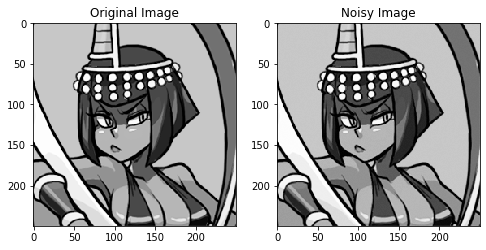

In [44]:
#generate a noisy image whose values {-1,1} are uniformly distributed
ex4 = np.copy(img)
noisy_img = np.random.randint(-1,1,size=ex4.shape[0]*ex4.shape[1])
noisy_img[noisy_img == 0] = 1
noisy_img = np.reshape(noisy_img, ex4.shape)

#add to the image
step4 = ex4 + noisy_img

f,ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(ex4, cmap="Greys_r")
ax[0].set_title("Original Image")
ax[1].imshow(step4, cmap="Greys_r")
ax[1].set_title("Noisy Image")

We notice that since the pixel difference is only changed by 1, we don't really notice a difference at all between the images graphically (to the human user eyes)

Text(0.5, 1.0, 'Noise 15')

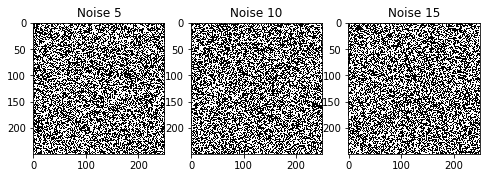

In [65]:
noisy5 = np.random.randint(-1,1,size=ex4.shape[0]*ex4.shape[1])
noisy5[noisy5 == 0] = 5
noisy5[noisy5 == -1] = -5
noisy5 = np.reshape(noisy5, ex4.shape)

noisy10 = np.random.randint(-1,1,size=ex4.shape[0]*ex4.shape[1])
noisy10[noisy10 == 0] = 10
noisy10[noisy10 == -1] = -10
noisy10 = np.reshape(noisy10, ex4.shape)

noisy15 = np.random.randint(-1,1,size=ex4.shape[0]*ex4.shape[1])
noisy15[noisy15 == 0] = 15
noisy15[noisy15 == -1] = -15
noisy15 = np.reshape(noisy15, ex4.shape)

f,ax = plt.subplots(1,3, figsize=(8,8))
ax[0].imshow(noisy5, cmap="Greys_r")
ax[0].set_title("Noise 5")
ax[1].imshow(noisy10, cmap="Greys_r")
ax[1].set_title("Noise 10")
ax[2].imshow(noisy15, cmap="Greys_r")
ax[2].set_title("Noise 15")

In [47]:
def PSNR(img1, img2):
    return 20 * math.log10(255.0/math.sqrt(np.mean((img1-img2)**2)))

[34.15140352195873, 28.130803608679106, 24.60897842756548]


Text(0.5, 1.0, 'Noise 15')

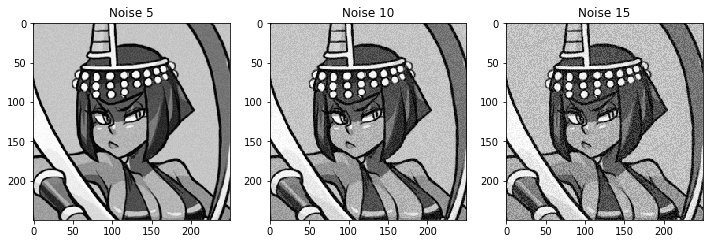

In [68]:
#add the noisy images and determine PSNR value
ex4_noise5 = ex4 + noisy5
ex4_noise10 = ex4 + noisy10
ex4_noise15 = ex4 + noisy15
x = [5,10,15]
y = [PSNR(ex4, ex4_noise5), PSNR(ex4, ex4_noise10), PSNR(ex4, ex4_noise15)]
print(y)

f,ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(ex4_noise5, cmap="Greys_r")
ax[0].set_title("Noise 5")
ax[1].imshow(ex4_noise10, cmap="Greys_r")
ax[1].set_title("Noise 10")
ax[2].imshow(ex4_noise15, cmap="Greys_r")
ax[2].set_title("Noise 15")

Text(0, 0.5, 'PSNR Value')

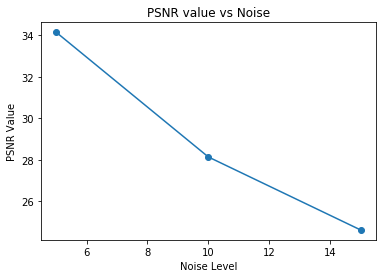

In [62]:
plt.plot(x,y, 'o-')
plt.title("PSNR value vs Noise")
plt.xlabel("Noise Level")
plt.ylabel("PSNR Value")

We can see a big decrease in the PSNR value, even though we can see from before that the image quality has not been degraded to the point of unrecognition. However, because PSNR is calculated using MSE, any small changes in the pixels will be reflected in the PSNR value even if the image itself doesn't seem that altered.